In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [4]:
train = pd.read_csv('ua.base', sep="\t", header=None)
train.columns = ['user_id', 'item_id', 'rating', 'timestamp']
train = train.drop(['timestamp'], axis=1)

train.user_id = train.user_id - 1
train.item_id = train.item_id - 1

test = pd.read_csv('ua.test', sep="\t", header=None)
test.columns = ['user_id', 'item_id', 'rating', 'timestamp']
test = test.drop(['timestamp'], axis=1)

test.user_id = test.user_id - 1
test.item_id = test.item_id - 1


In [7]:
class SVDModel:
    def __init__(self, lr=0.1, reg=0.5, n_components=10, n_epochs=1, random_state=42):
        self.lr = lr
        self.reg = reg
        self.n_components = n_components
        self.n_epochs = n_epochs
        self.rng = np.random.RandomState(random_state)
        
    def fit(self, train):
        self.global_mean = train.rating.mean()
        self.u_count = train.user_id.max() + 1
        self.i_count = train.item_id.max() + 1
        self.u_factors = self.rng.normal(0, 0.1, (self.u_count, self.n_components))
        self.i_factors = self.rng.normal(0, 0.1, (self.i_count, self.n_components))
        self.u_bias = np.zeros(shape=(self.u_count,))
        self.i_bias = np.zeros(shape=(self.i_count,))
        self.trainset = train.to_numpy()
        for _ in tqdm(range(self.n_epochs)):
            for u, i, r in self.trainset:
                pred = self.estimate(u, i)
                e = r - pred # to have another error
                self.u_bias[u] += self.lr * (e - self.reg * self.u_bias[u])
                self.i_bias[i] += self.lr * (e - self.reg * self.i_bias[i])
                self.u_factors[u] += self.lr * (e * self.i_factors[i] - self.reg * self.u_factors[u])
                self.i_factors[i] += self.lr * (e * self.u_factors[u] - self.reg * self.i_factors[i])

        
    # create prediction for user and item
    def estimate(self, user_id, item_id):
        est  = self.global_mean + self.u_bias[user_id] + self.i_bias[item_id]
        est += sum(self.u_factors[user_id] * self.i_factors[item_id])
        return est

    # create prediction for list of user ids and list of item ids
    def predict(self, user_ids, item_ids):
        pred = []
        for u, i in zip(user_ids, item_ids):
            pred.append(self.estimate(u, i))
        return pred

    def rmse(self, y_true, y_pred):
        return np.sqrt(((y_true - y_pred) ** 2).mean())
    


In [8]:
results = pd.DataFrame()
for lr in [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01][:]:
    for reg in [0.009, 0.01, 0.015, 0.017, 0.02, 0.023, 0.025, 0.027, 0.03][:]:
        m = SVDModel(lr=lr, reg=reg)
        m.fit(train)
        y_pred = m.predict(test.user_id, test.item_id)
        results = results.append(
            {
                'lr': lr,
                'reg': reg,
                'result': m.rmse(test.rating, y_pred)
            }, ignore_index=True
        )
        print(lr, reg, flush=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]

0.001 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.001 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]

0.001 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]

0.001 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]

0.001 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.001 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]

0.001 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.001 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]

0.001 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]

0.002 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]

0.002 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.002 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]

0.002 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]

0.002 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]

0.002 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]

0.002 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]

0.002 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]

0.002 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.00s/it]

0.003 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.003 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.07s/it]

0.003 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]

0.003 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.003 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]

0.003 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]

0.003 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.003 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.03s/it]

0.003 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]

0.004 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]

0.004 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.36s/it]

0.004 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]

0.004 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]

0.004 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]

0.004 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.42s/it]

0.004 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]

0.004 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]

0.004 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.01s/it]

0.005 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]

0.005 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]

0.005 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]

0.005 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.005 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]

0.005 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.85s/it]

0.005 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]

0.005 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]

0.005 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]

0.006 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]

0.006 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.006 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.006 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]

0.006 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.006 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]

0.006 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.44s/it]

0.006 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]

0.006 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]

0.007 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]

0.007 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]

0.007 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.04s/it]

0.007 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]

0.007 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]

0.007 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.60s/it]

0.007 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]

0.007 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.58s/it]

0.007 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.15s/it]

0.008 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.24s/it]

0.008 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.65s/it]

0.008 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.68s/it]

0.008 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.06s/it]

0.008 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.09s/it]

0.008 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.16s/it]

0.008 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.44s/it]

0.008 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.008 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.49s/it]

0.009 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.99s/it]

0.009 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.47s/it]

0.009 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]

0.009 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.20s/it]

0.009 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.14s/it]

0.009 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]

0.009 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]

0.009 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]

0.009 0.03



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]

0.01 0.009



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]

0.01 0.01



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.44s/it]

0.01 0.015



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]

0.01 0.017



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.42s/it]

0.01 0.02



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.89s/it]

0.01 0.023



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.88s/it]

0.01 0.025



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.91s/it]

0.01 0.027



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.47s/it]

0.01 0.03


In [9]:
m = SVDModel(lr=0.005, reg=0.02, n_components=100, n_epochs=20)
m.fit(train)
y_pred = m.predict(test.user_id, test.item_id)
m.rmse(test.rating, y_pred)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00,  3.46s/it]


0.9552403483464579

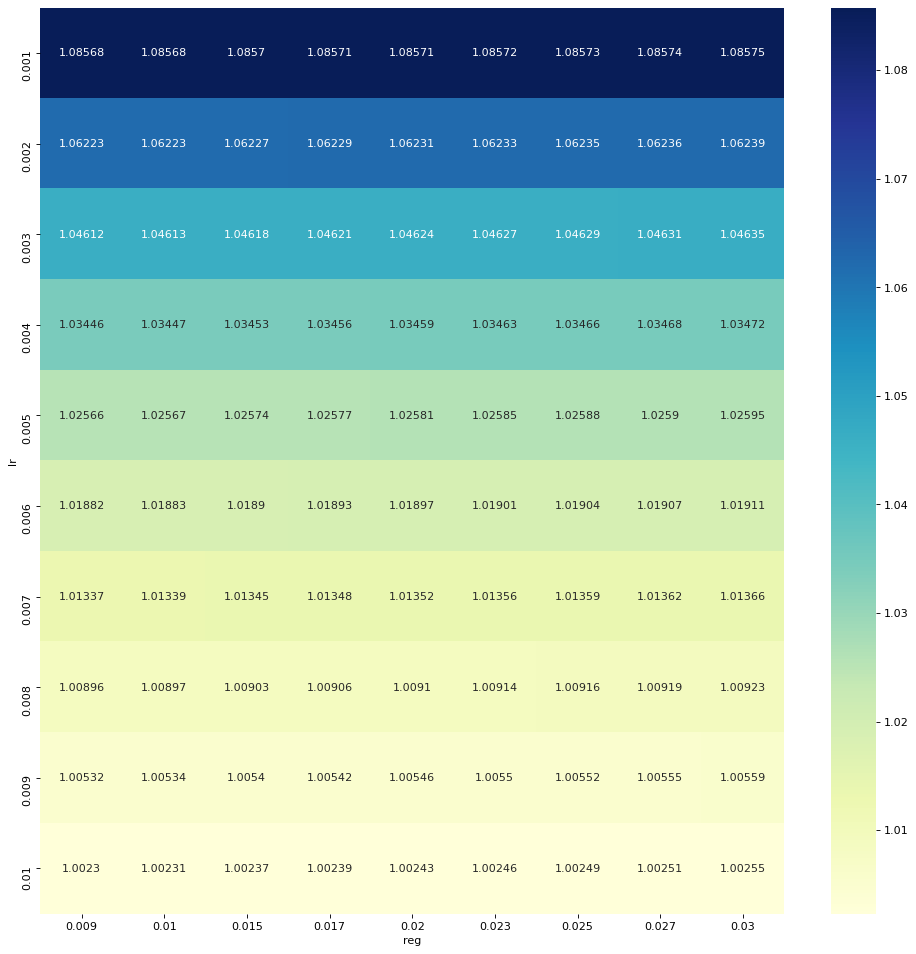

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
to_show = results.pivot(index='lr', columns='reg', values='result')
sns.heatmap(to_show, annot=True, fmt="g", cmap='YlGnBu')
plt.show()

In [1]:
import cowsay
cowsay.cheese('MINIMUM ERROR IS 1.0023')

  _______________________
| MINIMUM ERROR IS 1.0023 |
                       \
                        \
                         \
                          \
                            /     \_/         |
                           |                 ||
                           |                 ||
                          |    ###\  /###   | |
                          |     0  \/  0    | |
                         /|                 | |
                        / |        <        |\ \
                       | /|                 | | |
                       | |     \_______/   |  | |
                       | |                 | / /
                       /||                 /|||
                          ----------------|
                               | |    | |
                               ***    ***
                              /___\  /___\


In [17]:
cowsay.ghostbusters('BEST PARAMETERS ARE:\n lr = 0.01, reg = 0.009')

  ______________________
 /                      \
| BEST PARAMETERS ARE:   |
| lr = 0.01, reg = 0.009 |
 \                      /
                              \
                               \
                                \
                                 \
                                             __---__
                                          _-       /--______
                                     __--( /     \ )XXXXXXXXXXX\v.
                                   .-XXX(   O   O  )XXXXXXXXXXXXXXX-
                                  /XXX(       U     )        XXXXXXX\
                                /XXXXX(              )--_  XXXXXXXXXXX\
                               /XXXXX/ (      O     )   XXXXXX   \XXXXX\
                               XXXXX/   /            XXXXXX   \__ \XXXXX
                               XXXXXX__/          XXXXXX         \__---->
                       ---___  XXX__/          XXXXXX      \__         /
                         \-  --__/   ___/\  XXXXXX